# Data Wrangling

I have found, and am leveraging detailed steps of the data wrangling process, as laid out in [this article](https://hevodata.com/learn/data-wrangling/):
- Step 1: Data Discovery
- Step 2: Data Structuring
- Step 3: Data Cleaning
- Step 4: Data Enriching
- Step 5: Data Validating
- Step 6: Data Publishing

## Load in standard dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Load in our selected CSV
As the uncompressed CSV file is ~1.4GB, it has not been included in the repository.  Please find the dataset at the following location: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

In [2]:
raw_df = pd.read_csv('../data/raw/vehicles.csv')

## [Step 1: Data Discovery](https://hevodata.com/learn/data-wrangling/#s1)

The first step in the Data Wrangling process is Discovery. This is an all-encompassing term for understanding or getting familiar with your data. You must take a look at the data you have and think about how you would like it organized to make it easier to consume and analyze. 

So, you begin with an Unruly Crowd of Data collected from multiple sources in a wide range of formats. At this stage, the goal is to compile the Disparate, Siloed data sources and configure each of them so they can be understood and examined to find patterns and trends in the data.

In [3]:
raw_df.shape

(426880, 26)

We have lots of observations -- 426,880 of them!

In [4]:
raw_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [6]:
cleaning_tasks = []
cleaning_tasks.append('drop county column entirely')

In [7]:
raw_df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


We have a car from as early as 1900!

In [8]:
from_1900 = raw_df[raw_df['year'] == 1900]
from_1900.shape

(12, 26)

Twelve of them! Let's look st the descriptions

In [9]:
from_1900.iloc[1]

id                                                     7313782174
url             https://inlandempire.craigslist.org/cto/d/coro...
region                                              inland empire
region_url                    https://inlandempire.craigslist.org
price                                                           1
year                                                       1900.0
manufacturer                                                  NaN
model                                                         All
condition                                                    fair
cylinders                                                   other
fuel                                                        other
odometer                                                 100000.0
title_status                                                clean
transmission                                                other
VIN                                                         00000
drive     

Some of them say 'parts only', in `title_status`.  We will have to look out for that.  We are trying to price out solid cars only!

In [10]:
cleaning_tasks.append('remove entries where title_status is "parts only"')

Are the 1900 cars mistakenly labelled?  Let's look at 1901:

In [11]:
from_1901 = raw_df[raw_df['year'] == 1901]
from_1901.iloc[2]

id                                                     7313962943
url             https://plattsburgh.craigslist.org/ctd/d/peru-...
region                                    plattsburgh-adirondacks
region_url                     https://plattsburgh.craigslist.org
price                                                        4000
year                                                       1901.0
manufacturer                                                  NaN
model                                                 olds type r
condition                                                    good
cylinders                                                   other
fuel                                                          gas
odometer                                                    100.0
title_status                                              missing
transmission                                                other
VIN                                                           NaN
drive     

Looks like this one is a replica!  Do we want to include these?  How many do we have?

In [12]:
replicas = raw_df[
    raw_df['description'].str.contains(r'replica', na=True)
]
replicas.shape

(315, 26)

315 is not insignificant.  I think the pricing for replicas may skew our model.  315 is not signicant enough to create a new "Replica" feature to nearly half a million occourances.  I say drop them!

In [13]:
cleaning_tasks.append('drop rows where description field contains "replica"')

Let's keep looking through random entries to see what we can find!

In [14]:
raw_df.iloc[42]

id                                                     7315379459
url             https://auburn.craigslist.org/ctd/d/auburn-uni...
region                                                     auburn
region_url                          https://auburn.craigslist.org
price                                                       37990
year                                                       2016.0
manufacturer                                            chevrolet
model                                          camaro ss coupe 2d
condition                                                    good
cylinders                                             8 cylinders
fuel                                                          gas
odometer                                                   9704.0
title_status                                                clean
transmission                                                other
VIN                                             1G1FF1R79G0140582
drive     

Looking into the VIN label, this is entirely unique to each individual vehicle, and will not yeild predictive power.  Drop it.

In [15]:
cleaning_tasks.append('drop VIN column')

What are the upper and lower bounds for prices?

In [16]:
raw_df['price'].min()

0

Drop anything with 0 price

In [17]:
cleaning_tasks.append('drop rows with price = 0')

Let's check our upper bounds

In [18]:
raw_df['price'].max()

3736928711

Somehow a car priced at `$3,736,928,711` does not seem realistic.  [This article](https://worthly.com/most-expensive/cars/feature-the-most-expensive-cars-ever-listed-on-craigslist/) suggests the most expensive vehicle sold on craigslist was a 1994 McLaren F1 at `$7.89` Million



In [19]:
cleaning_tasks.append('drop rows with price > 7890000')

[This article](https://www.hotcars.com/15-cars-with-the-highest-mileage-ever-recorded/#:~:text=1%201966%20Volvo%20P1800%20%E2%80%93%203.25%20Million%20Miles&text=Fitting%20that%20a%20Volvo%20would,wasn't%20just%20any%20Volvo.) suggests the higest recorded odometer is 3.04 million

In [20]:
cleaning_tasks.append('drop rows with odometer > 3040000')

Are there any one-dollar deals?  What are they like?

In [21]:
one_dollar = raw_df[raw_df['price'] == 1]
one_dollar.shape

(1951, 26)

Oh yes, let's check them out

In [22]:
one_dollar.iloc[1]

id                                                     7310121191
url             https://bham.craigslist.org/cto/d/birmingham-2...
region                                                 birmingham
region_url                            https://bham.craigslist.org
price                                                           1
year                                                       2002.0
manufacturer                                               nissan
model                                                      maxima
condition                                                     NaN
cylinders                                                     NaN
fuel                                                          gas
odometer                                                 196000.0
title_status                                                clean
transmission                                            automatic
VIN                                                           NaN
drive     

Some of these have the true asking price in the description.

In [23]:
price_in_desc = raw_df[
    raw_df['description'].str.contains(r'\$[0-9]', na=False)
]
price_in_desc.shape

(265527, 26)

In [24]:
price_in_desc.iloc[42]

id                                                     7311818339
url             https://auburn.craigslist.org/ctd/d/auburn-uni...
region                                                     auburn
region_url                          https://auburn.craigslist.org
price                                                       18590
year                                                       2018.0
manufacturer                                                honda
model                                           civic lx sedan 4d
condition                                                    good
cylinders                                                     NaN
fuel                                                          gas
odometer                                                  28942.0
title_status                                                clean
transmission                                                other
VIN                                             19XFC2F59JE206832
drive     

There are too many of these to go through, but they appear to be benign.  But we should drop the one-dollar deals, as they will surely skew our measurements

In [25]:
cleaning_tasks.append('drop rows with price = 1')

Remind ourselves to remove duplicates

In [26]:
cleaning_tasks.append('remove duplicate rows')

Nice!  Let's flip through some random entries, and see what else we can find

In [27]:
raw_df.iloc[424242]

id                                                     7310369078
url             https://milwaukee.craigslist.org/ctd/d/waukega...
region                                                  milwaukee
region_url                       https://milwaukee.craigslist.org
price                                                        7499
year                                                       2002.0
manufacturer                                                dodge
model                                               grand caravan
condition                                                     NaN
cylinders                                             8 cylinders
fuel                                                          gas
odometer                                                 140031.0
title_status                                                clean
transmission                                            automatic
VIN                                                           NaN
drive     

curious about `title_status`.  I'm not sure what it means.

In [28]:
raw_df['title_status'].unique()

array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
       'parts only'], dtype=object)

Similar to `parts only`, I think we should remove `salvage`, as those, to me, are synonymous?  How many are there?

In [29]:
replicas = raw_df[raw_df['title_status'] == 'salvage']
replicas.shape[0] / raw_df.shape[0]

0.009061094452773612

At less than 1%, I think we should dump it.  Sam deals only in whole cars

In [30]:
cleaning_tasks.append('drop rows with title_status = "salvage"')

Liens are interesting.  How many are there?

In [31]:
liens = raw_df[raw_df['title_status'] == 'lien']
liens.shape[0] / raw_df.shape[0]

0.0033311469265367316

Yikes, that's not completely insignificant.  Selling a car that the seller does not completely own puts downward pressure on the price figure.  These instances could artifially skew our model, so I think we should drop them

In [32]:
cleaning_tasks.append('drop rows with title_status = "lien"')

In [33]:
raw_df['paint_color'].unique()

array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [34]:
raw_df['condition'].unique()

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

`salvage` is also captured in `condition`.  Let's remove that too

In [35]:
cleaning_tasks.append('drop rows with condition = "salvage"')

## [Step 2: Data Structuring](https://hevodata.com/learn/data-wrangling/#s2)
When raw data is collected, it’s in a wide range of formats and sizes. It has no definite structure, which means that it lacks an existing model and is completely disorganized. It needs to be restructured to fit in with the Analytical Model deployed by your business, and giving it a structure allows for better analysis. 

Unstructured data is often text-heavy and contains things such as Dates, Numbers, ID codes, etc. At this stage of the Data Wrangling process, the dataset needs to be parsed. 

This is a process whereby relevant information is extracted from fresh data. For example, if you are dealing with code scrapped from a website, you might parse HTML code, pull out what you need, and discard the rest. 

This will result in a more user-friendly spreadsheet that contains useful data with columns, classes, headings, and so on.

In [36]:
raw_df.iloc[42]

id                                                     7315379459
url             https://auburn.craigslist.org/ctd/d/auburn-uni...
region                                                     auburn
region_url                          https://auburn.craigslist.org
price                                                       37990
year                                                       2016.0
manufacturer                                            chevrolet
model                                          camaro ss coupe 2d
condition                                                    good
cylinders                                             8 cylinders
fuel                                                          gas
odometer                                                   9704.0
title_status                                                clean
transmission                                                other
VIN                                             1G1FF1R79G0140582
drive     

There are a few columns that will not provide much instight, where not much value can be drived, particularly `image_url`, `url`, `region_url`, `VIN`, `id`, and `county`.  I don't believe there is any more insign we can get out of the dirty & highlky variable content found within the `description` column, so I think we should drop it

In [37]:
cleaning_tasks.append('drop columns: image_url, url, region_url, VIN, id, county, description')

## [Step 3: Data Cleaning](https://hevodata.com/learn/data-wrangling/#s3)
Most people use the words Data Wrangling and Data Cleaning interchangeably. However, these are two very different processes. Although a complex process in itself, Cleaning is just a single aspect of the overall Data Wrangling process.

For the most part, raw data comes with a lot of errors that have to be cleaned before the data can move on to the next stage. Data Cleaning involves Tackling Outliers, Making Corrections, Deleting Bad Data completely, etc. This is done by applying algorithms to tidy up and sanitize the dataset.

Cleaning the data does the following:

- It removes outliers from your dataset that can potentially skew your results when analyzing the data. 
- It changes any null values and standardizes the data format to improve quality and consistency.
- It identifies duplicate values and standardizes systems of measurements, fixes structural errors and typos, and validates the data to make it easier to handle.

You can automate different algorithmic tasks using a variety of tools such as Python and R (more on that later). 

In [38]:
set(cleaning_tasks)

{'drop VIN column',
 'drop columns: image_url, url, region_url, VIN, id, county, description',
 'drop county column entirely',
 'drop rows where description field contains "replica"',
 'drop rows with condition = "salvage"',
 'drop rows with odometer > 3040000',
 'drop rows with price = 0',
 'drop rows with price = 1',
 'drop rows with price > 7890000',
 'drop rows with title_status = "lien"',
 'drop rows with title_status = "salvage"',
 'remove duplicate rows',
 'remove entries where title_status is "parts only"'}

Let's get on these cleaning tasks!

In [39]:
# remove entries where title_status is "parts only
clean_df = raw_df[raw_df['title_status'] != 'parts only'] 
clean_df[clean_df['title_status'] == 'parts only'] .shape

(0, 26)

In [40]:
# 'drop rows with price = 0',
# 'drop rows with price = 1',
clean_df = clean_df[clean_df['price'] > 2] 
clean_df[clean_df['price'] < 2].shape

(0, 26)

In [41]:
# 'drop rows where description field contains "replica"'
clean_df = clean_df[~clean_df['description'].str.contains(r'replica', na=True)]
clean_df[clean_df['description'].str.contains(r'replica', na=True)].shape

(0, 26)

In [42]:
# 'drop rows with odometer > 3040000'
clean_df = clean_df[clean_df['odometer'] < 3040000] 
clean_df[clean_df['odometer'] > 3040000].shape

(0, 26)

In [43]:
# 'drop rows with price > 7890000'
clean_df = clean_df[clean_df['price'] < 7890000] 
clean_df[clean_df['price'] > 7890000].shape

(0, 26)

In [44]:
# it turns out the entries we have over 1M are garbage, so lets drop those too
clean_df = clean_df[clean_df['price'] < 1000000] 
clean_df[clean_df['price'] > 1000000].shape

(0, 26)

In [45]:
# 'drop rows with condition = "salvage"'
clean_df = clean_df[clean_df['condition'] != 'salvage'] 
clean_df[clean_df['condition'] == 'salvage'].shape

(0, 26)

In [46]:
# 'drop rows with title_status = "lien"',
clean_df = clean_df[clean_df['title_status'] != 'lien'] 
clean_df[clean_df['title_status'] == 'lien'].shape

(0, 26)

In [47]:
# 'drop rows with title_status = "salvage"',
clean_df = clean_df[clean_df['title_status'] != 'salvage'] 
clean_df[clean_df['title_status'] == 'salvage'].shape

(0, 26)

In [48]:
# 'remove entries where title_status is "parts only"'
clean_df = clean_df[clean_df['title_status'] != 'parts only'] 
clean_df[clean_df['title_status'] == 'parts only'].shape

(0, 26)

In [49]:
#  image_url, url, region_url, VIN, id, county, description'
clean_df.drop(['image_url', 'url', 'region_url', 'VIN', 'id', 'county', 'description'], axis=1, inplace=True)

In [50]:
clean_df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al,32.590,-85.4800,2021-05-04T12:31:18-0500
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al,32.590,-85.4800,2021-05-04T12:31:08-0500
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al,32.590,-85.4800,2021-05-04T12:31:25-0500
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al,32.590,-85.4800,2021-05-04T10:41:31-0500
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,32.592,-85.5189,2021-05-03T14:02:03-0500


In [51]:
clean_df[clean_df['price'] > 200000].shape

(56, 19)

In [52]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383592 entries, 27 to 426879
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        383592 non-null  object 
 1   price         383592 non-null  int64  
 2   year          382482 non-null  float64
 3   manufacturer  368138 non-null  object 
 4   model         379168 non-null  object 
 5   condition     235395 non-null  object 
 6   cylinders     226753 non-null  object 
 7   fuel          381270 non-null  object 
 8   odometer      383592 non-null  float64
 9   title_status  376128 non-null  object 
 10  transmission  382074 non-null  object 
 11  drive         266432 non-null  object 
 12  size          106830 non-null  object 
 13  type          301012 non-null  object 
 14  paint_color   270144 non-null  object 
 15  state         383592 non-null  object 
 16  lat           380184 non-null  float64
 17  long          380184 non-null  float64
 18  pos

In [53]:
clean_df.shape[0] / raw_df.shape[0]

0.8985944527736132

We're now working with ~89% of the data we had before cleaning.  Not bad!

Let's how our prices fit to each manufacturer

In [54]:
make_price_means = clean_df.groupby('manufacturer')[['price']].mean()
make_price_means.sort_values(by='price', ascending=False)

,price
manufacturer,
ferrari,126426.067568
aston-martin,61136.619048
tesla,39532.069880
porsche,34402.292063
ram,30121.412393
rover,29189.839836
alfa-romeo,28980.778935
jaguar,27311.390567
gmc,25256.820958


Looks about right!

Let's check the most expensive 1% of vehicles.  What manufacturer are they? 

In [55]:
percentage=round(len(clean_df)/100*0.1) 
top_one = clean_df.sort_values(by='price', ascending=False).head(percentage)

top_one.groupby('manufacturer')[['price']].max().sort_values(by='price', ascending=False)

,price
manufacturer,
ford,999999
mercedes-benz,990000
gmc,777777
chrysler,655000
ferrari,449500
jeep,425000
porsche,304995
lincoln,215000
cadillac,195000


According to [this article](https://www.hotcars.com/most-expensive-ford-cars-2022/#2023-ford-f-150-limited---84-910), the most expensive ford on the market is `$500k`, so let's trim that.  Also, [this page](https://getjerry.com/questions/what-is-the-most-expensive-gmc) indicates GMCs top out around `$70,600`. [This](https://rarest.org/stuff/expensive-jeeps) suggests Jeeps top out around `$225,000`

In [56]:
# 'remove too expensive entries for GMC
clean_df = clean_df[~((clean_df['price'] > 70600) & (clean_df['manufacturer'] == 'gmc'))]
clean_df[clean_df['manufacturer'] == 'gmc']['price'].max()

70378

In [57]:
# 'remove too expensive entries for ford
clean_df = clean_df[~((clean_df['price'] > 500000) & (clean_df['manufacturer'] == 'ford'))]
clean_df[clean_df['manufacturer'] == 'ford']['price'].max()

225000

In [58]:
# 'remove too expensive entries for Jeep
clean_df = clean_df[~((clean_df['price'] > 225000) & (clean_df['manufacturer'] == 'jeep'))]
clean_df[clean_df['manufacturer'] == 'jeep']['price'].max()

140000

## [Step 4: Data Enriching](https://hevodata.com/learn/data-wrangling/#s4)
At this stage of the Data Wrangling process, you’ve become familiar with, and have a deep understanding of the data at hand. 

Now the question is, do you want to embellish or enrich the data? Do you want it augmented with other data?

Combining your raw data with additional data from other sources such as internal systems, third-party providers, etc. will help you accumulate even more data points to improve the accuracy of your analysis. Alternatively, your goal might be to simply fill in gaps in the data. For instance, combining two databases of customer information where one contains customer addresses, and the other one doesn’t. 

Enriching the data is an optional step that you only need to take if your current data doesn’t meet your requirements.

We should calculate the age of the vehicle, by subtracting the current year from the year the cehicle was made

In [59]:
print(clean_df['posting_date'].min())
print(clean_df['posting_date'].max())

2021-04-04T00:10:40-0700
2021-05-04T23:24:09-0500


There doesnt appear to be much range in this posting date, so I think we can round up, and subtract to get a sense of the age of the vehicle

In [60]:
clean_df['age_of_vehicle'] = 2022 - clean_df['year']

In [61]:
clean_df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,age_of_vehicle
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al,32.590,-85.4800,2021-05-04T12:31:18-0500,8.0
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al,32.590,-85.4800,2021-05-04T12:31:08-0500,12.0
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al,32.590,-85.4800,2021-05-04T12:31:25-0500,2.0
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al,32.590,-85.4800,2021-05-04T10:41:31-0500,5.0
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,32.592,-85.5189,2021-05-03T14:02:03-0500,9.0


In [62]:
age_price_means = clean_df.groupby('age_of_vehicle')[['price']].mean()
age_price_means.sort_values(by='price', ascending=False)

,price
age_of_vehicle,
109.0,85000.000000
89.0,48430.000000
2.0,37030.773600
88.0,34575.236842
90.0,34367.340000
...,...
77.0,6800.000000
107.0,5000.000000
78.0,4733.333333


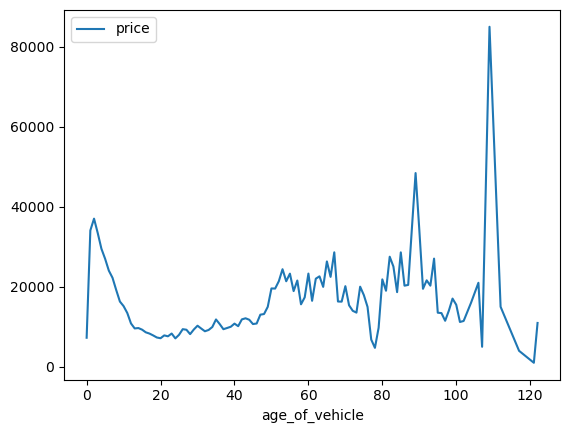

In [63]:
age_price_means.plot()
plt.show()

Very interesting!  It looks like brand new cars are a little more expensive, then that average price drops pretty quickly -- and steadily.  Then these prices both ramp up, and get volitile.  Maybe the volitility is dependant on the wuality of the vehicle?

## [Step 5: Data Validating](https://hevodata.com/learn/data-wrangling/#s5)
Validating the data is an activity that services any issues in the quality of your data so they can be addressed with the appropriate transformations. 

The rules of data validation require repetitive programming processes that help to verify the following:

- Quality
- Consistency
- Accuracy
- Security
- Authenticity

This is done by checking things such as whether the fields in the datasets are accurate, and if attributes are normally distributed. Preprogrammed scripts are used to compare the data’s attributes with defined rules. 

This is a great example of the overlap that sometimes happens between Data Cleaning and Data Wrangling – Validation is the Key to Both. 

This process may need to be repeated several times since you are likely to find errors.

We had done some validating of this data in cells 39 - 49.  But we can carry onto the other tasks.  Let's fill some nan values with the default labels.

In [64]:
clean_df['cylinders'].unique()

array(['8 cylinders', '6 cylinders', nan, '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

Let's fill these NaNs with 'other'

In [65]:
clean_df[['cylinders']] = clean_df[['cylinders']].fillna('other')
clean_df['cylinders'].unique()

array(['8 cylinders', '6 cylinders', 'other', '4 cylinders',
       '5 cylinders', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [66]:
# same with `fuel`
clean_df['fuel'].unique()

array(['gas', 'other', 'diesel', 'hybrid', nan, 'electric'], dtype=object)

In [67]:
clean_df[['fuel']] = clean_df[['fuel']].fillna('other')
clean_df['fuel'].unique()

array(['gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [68]:
clean_df['title_status'].unique()

array(['clean', 'rebuilt', nan, 'missing'], dtype=object)

In [69]:
# we can replace these nan values with the 'missing' label
clean_df[['title_status']] = clean_df[['title_status']].fillna('missing')
clean_df['title_status'].unique()

array(['clean', 'rebuilt', 'missing'], dtype=object)

In [70]:
# transmission
clean_df['transmission'].unique()

array(['other', 'automatic', 'manual', nan], dtype=object)

In [71]:
clean_df[['transmission']] = clean_df[['transmission']].fillna('other')
clean_df['transmission'].unique()

array(['other', 'automatic', 'manual'], dtype=object)

In [72]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383352 entries, 27 to 426879
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   region          383352 non-null  object 
 1   price           383352 non-null  int64  
 2   year            382242 non-null  float64
 3   manufacturer    367898 non-null  object 
 4   model           378935 non-null  object 
 5   condition       235349 non-null  object 
 6   cylinders       383352 non-null  object 
 7   fuel            383352 non-null  object 
 8   odometer        383352 non-null  float64
 9   title_status    383352 non-null  object 
 10  transmission    383352 non-null  object 
 11  drive           266219 non-null  object 
 12  size            106815 non-null  object 
 13  type            300806 non-null  object 
 14  paint_color     269947 non-null  object 
 15  state           383352 non-null  object 
 16  lat             379944 non-null  float64
 17  long     

In [73]:
clean_df['type'].unique()

array(['pickup', 'truck', 'other', nan, 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'convertible', 'wagon',
       'van'], dtype=object)

In [74]:
clean_df[['type']] = clean_df[['type']].fillna('other')
clean_df['type'].unique()

array(['pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'convertible', 'wagon',
       'van'], dtype=object)

<AxesSubplot:>

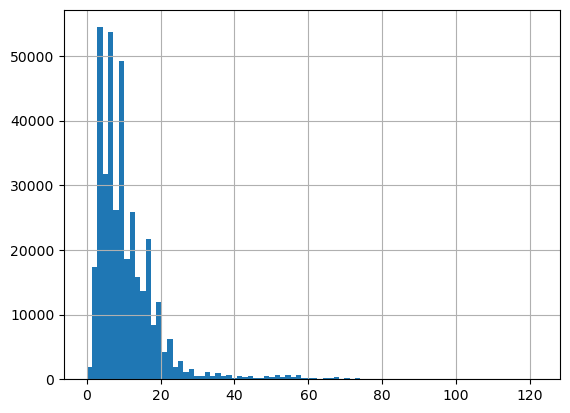

In [75]:
clean_df['age_of_vehicle'].hist(bins=84)

Looks like we have a very long tail on the age factor of these vehicles

let's see how the price varies by the condition of the vehicle

<AxesSubplot:xlabel='condition'>

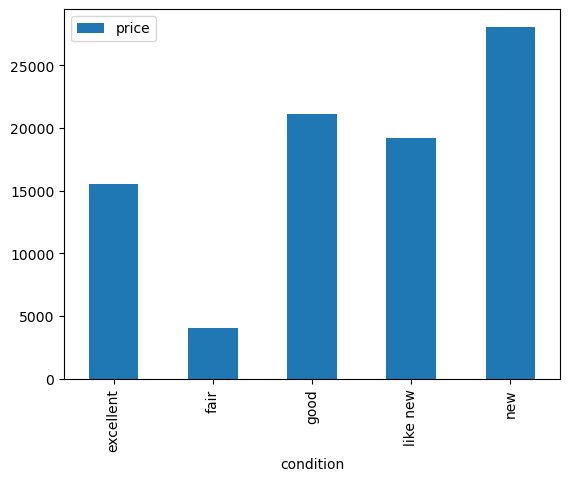

In [76]:
condition_price_means = clean_df.groupby('condition')[['price']].mean()
condition_price_means.plot(kind='bar')

What about by state?

<AxesSubplot:xlabel='state'>

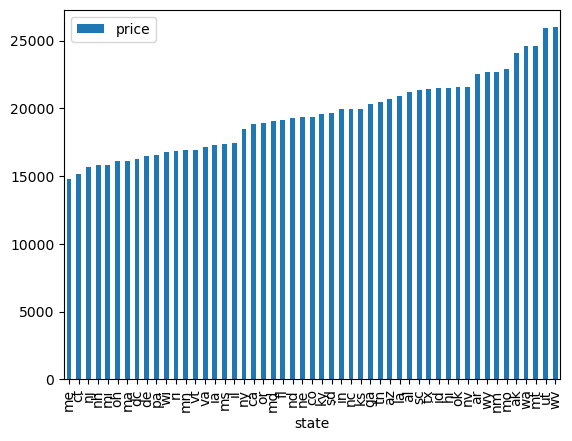

In [77]:
state_price_means = clean_df.groupby('state')[['price']].mean()
state_price_means.sort_values(by='price').plot(kind='bar')

In [78]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

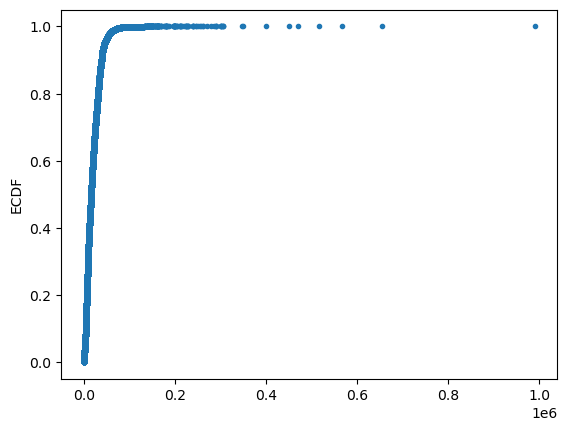

In [79]:
x_vers, y_vers = ecdf(clean_df['price'])
plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
plt.xlabel('')
plt.ylabel('ECDF')
plt.show()

## Judgement call!
Those last eight entries are skewing this distribution dramatically.  Should they be removed?

In [80]:
clean_df.reset_index()
clean_df.sort_values(by='price', ascending=False).head(8)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,age_of_vehicle
95119,ft myers / SW florida,990000,2017.0,mercedes-benz,amg g 63,NaN,8 cylinders,gas,4085.0,clean,automatic,4wd,NaN,SUV,white,fl,26.157900,-81.766548,2021-04-24T13:12:08-0400,5.0
79088,fort collins / north CO,655000,2010.0,chrysler,town & country,good,6 cylinders,gas,106000.0,clean,automatic,NaN,NaN,other,NaN,co,40.478853,-105.173998,2021-04-27T13:17:32-0600,12.0
149860,bloomington,566567,2006.0,chrysler,300,NaN,other,gas,130000.0,clean,automatic,NaN,NaN,other,NaN,in,38.872900,-86.487100,2021-04-28T05:36:20-0400,16.0
106361,orlando,516999,2016.0,NaN,Lambo Aventador SV Roadster,like new,12 cylinders,gas,9982.0,clean,automatic,4wd,full-size,convertible,white,fl,28.463700,-81.394800,2021-04-26T17:40:47-0400,6.0
113357,south florida,470000,2016.0,NaN,hINO 268,good,other,diesel,167268.0,clean,automatic,NaN,NaN,other,white,fl,26.231500,-80.123500,2021-04-30T10:56:33-0400,6.0
360604,nashville,449500,2019.0,ferrari,488 gtb,NaN,other,gas,500.0,clean,other,NaN,NaN,coupe,red,tn,35.840175,-86.387603,2021-04-25T13:17:40-0500,3.0
328193,altoona-johnstown,400123,2003.0,NaN,any and all,fair,5 cylinders,diesel,123321.0,clean,automatic,4wd,full-size,pickup,blue,pa,40.480100,-78.726300,2021-04-07T19:49:49-0400,19.0
45428,palm springs,349999,2020.0,ferrari,f8 tributo,excellent,8 cylinders,gas,2800.0,clean,automatic,NaN,NaN,coupe,NaN,ca,33.743904,-116.359028,2021-04-13T18:20:46-0700,2.0


There are two ferarris that I think we should keep.  But the others have spotty fields -- including an 'any and all	fair' instance of `model`.

Let's keep the legitimate entries -- the ferraris, and remove the others

In [81]:
to_drop = [
    95119,
    79088,
    149860,
    106361,
    113357,
    328193
]

In [82]:
clean_df.drop(index=to_drop, inplace=True)
clean_df.sort_values(by='price', ascending=False).head(8)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,age_of_vehicle
360604,nashville,449500,2019.0,ferrari,488 gtb,NaN,other,gas,500.0,clean,other,NaN,NaN,coupe,red,tn,35.840175,-86.387603,2021-04-25T13:17:40-0500,3.0
45428,palm springs,349999,2020.0,ferrari,f8 tributo,excellent,8 cylinders,gas,2800.0,clean,automatic,NaN,NaN,coupe,NaN,ca,33.743904,-116.359028,2021-04-13T18:20:46-0700,2.0
44387,palm springs,347999,2020.0,ferrari,f8 tributo,excellent,8 cylinders,gas,3000.0,clean,automatic,NaN,NaN,coupe,NaN,ca,33.743904,-116.359028,2021-04-29T08:34:08-0700,2.0
90274,"washington, DC",304995,2021.0,porsche,911,NaN,other,gas,22.0,clean,automatic,NaN,NaN,convertible,white,dc,38.762669,-77.461754,2021-04-28T16:44:20-0400,1.0
399462,winchester,304995,2021.0,porsche,911,NaN,other,gas,22.0,clean,automatic,NaN,NaN,convertible,white,va,38.762669,-77.461754,2021-04-28T15:49:25-0400,1.0
88588,"washington, DC",304995,2021.0,porsche,911,NaN,other,gas,22.0,clean,automatic,NaN,NaN,convertible,white,dc,38.762669,-77.461754,2021-05-03T09:35:13-0400,1.0
304898,oklahoma city,299991,2017.0,NaN,Lamborghini Huracan,NaN,10 cylinders,gas,13004.0,clean,automatic,rwd,NaN,coupe,blue,ok,32.964447,-96.918586,2021-04-30T16:58:19-0500,5.0
176115,new orleans,299991,2017.0,NaN,Lamborghini Huracan,NaN,10 cylinders,gas,13004.0,clean,automatic,rwd,NaN,coupe,blue,la,32.964447,-96.918586,2021-04-30T16:58:23-0500,5.0


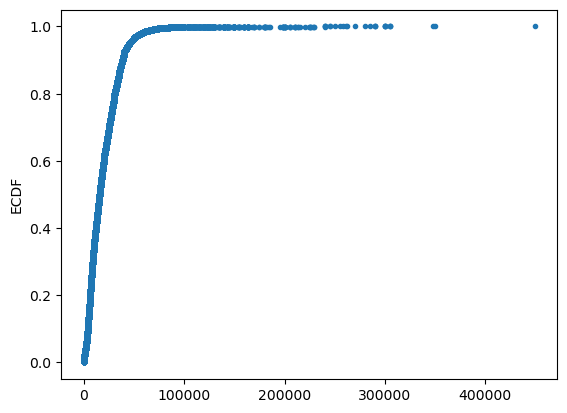

In [83]:
x_vers, y_vers = ecdf(clean_df['price'])
plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
plt.xlabel('')
plt.ylabel('ECDF')
plt.show()

This is looking a little bit better!  The top eight are luxury vehicles, so this is looking more realistic

In [84]:
clean_df[clean_df['model'].str.contains(r'Lamborghini', na=False)]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,age_of_vehicle
9080,flagstaff / sedona,229500,2019.0,NaN,Lamborghini Urus,NaN,8 cylinders,gas,32922.0,clean,automatic,4wd,compact,SUV,white,az,25.827103,-80.241520,2021-04-13T14:09:46-0700,3.0
11339,phoenix,109945,2004.0,NaN,Lamborghini Gallardo 6-Speed,excellent,10 cylinders,gas,57115.0,clean,manual,4wd,NaN,coupe,NaN,az,33.454195,-111.926096,2021-05-03T10:16:43-0700,18.0
42490,orange county,105000,2004.0,NaN,2004 Lamborghini Gallardo,excellent,10 cylinders,gas,18375.0,clean,manual,4wd,compact,coupe,white,ca,33.811000,-117.849300,2021-04-30T15:04:19-0700,18.0
60995,SF bay area,159991,2013.0,NaN,Lamborghini Gallardo,excellent,10 cylinders,gas,12329.0,clean,automatic,4wd,sub-compact,convertible,white,ca,37.410820,-122.123860,2021-05-04T09:22:22-0700,9.0
92186,daytona beach,197999,2015.0,NaN,Lamborghini Huracan,excellent,10 cylinders,gas,33875.0,clean,other,NaN,mid-size,coupe,green,fl,28.466088,-81.396429,2021-05-01T11:48:44-0400,7.0
92796,daytona beach,209999,2015.0,NaN,Lamborghini Huracan,excellent,10 cylinders,gas,11828.0,clean,other,NaN,mid-size,coupe,green,fl,28.466088,-81.396429,2021-04-21T15:30:32-0400,7.0
93705,florida keys,220000,2016.0,NaN,Lamborghini Huracan,like new,other,gas,13000.0,clean,automatic,rwd,full-size,convertible,white,fl,25.779100,-80.197800,2021-04-21T10:16:10-0400,6.0
99737,jacksonville,209999,2015.0,NaN,Lamborghini Huracan,excellent,10 cylinders,gas,11828.0,clean,other,NaN,mid-size,coupe,green,fl,28.466088,-81.396429,2021-04-21T15:32:33-0400,7.0
101289,lakeland,209999,2015.0,NaN,Lamborghini Huracan,excellent,10 cylinders,gas,11828.0,clean,other,NaN,mid-size,coupe,green,fl,28.466088,-81.396429,2021-04-21T15:34:32-0400,7.0
102617,ocala,197999,2015.0,NaN,Lamborghini Huracan,excellent,10 cylinders,gas,33875.0,clean,other,NaN,mid-size,coupe,green,fl,28.466088,-81.396429,2021-04-26T15:54:38-0400,7.0


All the Lamborghinis are missing a `manufacturer` label

In [85]:
clean_df.loc[clean_df['model'].str.contains(r'Lamborghini|lamborghini', na=False), ['manufacturer']] = 'Lamborghini'

In [86]:
clean_df[clean_df['model'].str.contains(r'Lamborghini', na=False)].head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,age_of_vehicle
9080,flagstaff / sedona,229500,2019.0,Lamborghini,Lamborghini Urus,NaN,8 cylinders,gas,32922.0,clean,automatic,4wd,compact,SUV,white,az,25.827103,-80.241520,2021-04-13T14:09:46-0700,3.0
11339,phoenix,109945,2004.0,Lamborghini,Lamborghini Gallardo 6-Speed,excellent,10 cylinders,gas,57115.0,clean,manual,4wd,NaN,coupe,NaN,az,33.454195,-111.926096,2021-05-03T10:16:43-0700,18.0
42490,orange county,105000,2004.0,Lamborghini,2004 Lamborghini Gallardo,excellent,10 cylinders,gas,18375.0,clean,manual,4wd,compact,coupe,white,ca,33.811000,-117.849300,2021-04-30T15:04:19-0700,18.0
60995,SF bay area,159991,2013.0,Lamborghini,Lamborghini Gallardo,excellent,10 cylinders,gas,12329.0,clean,automatic,4wd,sub-compact,convertible,white,ca,37.410820,-122.123860,2021-05-04T09:22:22-0700,9.0
92186,daytona beach,197999,2015.0,Lamborghini,Lamborghini Huracan,excellent,10 cylinders,gas,33875.0,clean,other,NaN,mid-size,coupe,green,fl,28.466088,-81.396429,2021-05-01T11:48:44-0400,7.0


In [87]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383346 entries, 27 to 426879
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   region          383346 non-null  object 
 1   price           383346 non-null  int64  
 2   year            382236 non-null  float64
 3   manufacturer    367926 non-null  object 
 4   model           378929 non-null  object 
 5   condition       235345 non-null  object 
 6   cylinders       383346 non-null  object 
 7   fuel            383346 non-null  object 
 8   odometer        383346 non-null  float64
 9   title_status    383346 non-null  object 
 10  transmission    383346 non-null  object 
 11  drive           266216 non-null  object 
 12  size            106813 non-null  object 
 13  type            383346 non-null  object 
 14  paint_color     269943 non-null  object 
 15  state           383346 non-null  object 
 16  lat             379938 non-null  float64
 17  long     

In [88]:
# manufacturer
clean_df[clean_df['manufacturer'].isna()]['model'].unique()

array(['Scion iM Hatchback 4D', 'blue bird bus', '1966 C-30 1 ton', ...,
       'ATI', '96 Suburban', 'Paige Glenbrook Touring'], dtype=object)

## [Step 6: Data Publishing](https://hevodata.com/learn/data-wrangling/#s6)
By this time, all the steps are completed and the data is ready for analytics. All that’s left is to publish the newly Wrangled Data in a place where it can be easily accessed and used by you and other stakeholders. 

You can deposit the data into a new architecture or database. As long as you completed the other processes correctly, the final output of your efforts will be high-quality data that you use to gain insights, create business reports, and more. 

You might even further process the data to create larger and more complex data structures such as Data Warehouses. At this point, the possibilities are endless.

In [89]:
clean_df.sort_values(by='price', ascending=True, inplace=True)

In [90]:
clean_df.reset_index(inplace=True)
clean_df.head()

,index,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,transmission,drive,size,type,paint_color,state,lat,long,posting_date,age_of_vehicle
0,137127,spokane / coeur d'alene,3,1985.0,chevrolet,k5,NaN,other,gas,76879.0,...,automatic,NaN,NaN,other,NaN,id,47.703854,-116.806489,2021-04-30T15:08:45-0700,37.0
1,145200,rockford,3,2015.0,chevrolet,traverse,NaN,6 cylinders,other,70721.0,...,automatic,fwd,NaN,SUV,blue,il,42.393700,-88.164800,2021-04-12T13:57:06-0500,7.0
2,297060,columbus,3,2009.0,pontiac,vibe,good,4 cylinders,gas,129342.0,...,automatic,fwd,compact,hatchback,silver,oh,40.042500,-82.977300,2021-04-17T12:26:09-0400,13.0
3,102947,ocala,3,2004.0,ford,expedition,good,6 cylinders,gas,235.0,...,automatic,NaN,full-size,other,grey,fl,29.105600,-82.098000,2021-04-21T21:24:17-0400,18.0
4,188090,boston,3,2008.0,chevrolet,silverado 1500,fair,8 cylinders,gas,200.0,...,automatic,4wd,NaN,other,NaN,ma,42.558100,-71.172300,2021-04-28T08:27:13-0400,14.0


In [91]:
# save the data to a new csv file
datapath = '../data/processed'
os.makedirs(datapath, exist_ok=True)  
clean_df.to_csv(f'{datapath}/vehicles_cleaned.csv')  